### [2 балла] Сделать демо на gradio

Модель готова! Теперь было бы круто, если модель можно было захостить и оттестировать на практике. В этом задании вам нужно будет реализовать демо на gradio, которое будет принимать изображение и вопрос, а далее выдавать ответ. Пример демо, аналогично которому вам нужно реализовать модель --- https://huggingface.co/spaces/nielsr/comparing-VQA-models.


**Подсказка:**

В вкладке `Files` на демо вы можете посмотреть реализацию, там нужно заменить инференс, используемой модели, на инференс нашей модели с переводом


**Ожидаемый результат**

В качестве результата в этой секции вам нужно код для запуска демо на градио и видеозапись его работы, где реализован описанный выше функционал. Видео прикрепляйте отдельным файлом.

# План решения

Ниже представлен код для реализации демо для этой части ДЗ на gradio. Использовать буду в Space Hugging Face
Ссылка на Space https://huggingface.co/spaces/Shakhovak/HW3_VQA_Demo
Как я поняла из документации Hugging Face, он будет работать 48 часов с запуска или прихода последнего пользователя, потом перезапускается с приходом нового пользователя.

Код ниже адаптирован для Space: добавлены файлы requirements.txt + packages.txt

Также записала свою работу со Space (на примере файлов из examples + скан рандомного счета). Запись с субтитрами по ссылке на google drive, доступ публичный https://drive.google.com/file/d/1RP5fkml1NeCVsdOyYUrzrd-zHcoWFx0O/view?usp=sharing. 

Локально не запускаю, так как не машине нет tessaract-ocr, модель VQA работает только в Space, но оболочка gradio запускается.

In [2]:
import torch
import gradio as gr
from transformers import pipeline


device = torch.device ('cuda' if torch.cuda.is_available() else 'cpu')
device

torch.hub.download_url_to_file('https://templates.invoicehome.com/invoice-template-us-neat-750px.png', 'invoice1.png')
torch.hub.download_url_to_file('https://www.accountingcoach.com/wp-content/uploads/2013/10/income-statement-example@2x.png', 'income_statement.jpg')


nlp = pipeline(task =  "document-question-answering",
    model='impira/layoutlm-document-qa', device = device)

ru_en = pipeline("translation", model="Helsinki-NLP/opus-mt-ru-en", device = device)
en_ru = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ru", device = device)

def image_recognition_translation(image, question, qu_language = 'EN'):
    if qu_language == 'RU':
        
        question = ru_en(question)[0]['translation_text']
        answer =  nlp(image, question)[0]['answer']
        answer = en_ru(answer)[0]['translation_text']
    else:
        answer =  nlp(image, question)[0]['answer']
           
    return answer

title = "Interactive demo: visual question answering (VQA) with language multiple choice"
description = "Gradio Demo for HW3 part 3. This demo requires image and question related to image content as input as well as question/answer language. As output the model finds the answer in the doc and produces it"
examples = [["invoice1.png", "Какой номер инвойса?", "RU"], 
            ["income_statement.jpg", "What are the 2020 net sales?", 'EN']]

outputs = gr.Textbox(label="Answer generated by model")
theme = 'huggingface'

interface = gr.Interface(fn=image_recognition_translation, 
                         inputs=[gr.Image(type="pil", label = 'Image for analysis'), 
                                 gr.Textbox(label="Question", lines = 2),
                                gr.Radio(["EN", "RU"], label="Question/Answer Language", info="Pick up the language of the the quesiton/answer")],
                         outputs=outputs,
                         examples=examples, 
                         title=title,
                         description=description,
                        )

if __name__ == "__main__":
    interface.launch(debug=True, share = True)

100%|█████████████████████████████████████████████████████████████████████████████| 23.9k/23.9k [00:00<00:00, 24.5MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 29.3k/29.3k [00:00<00:00, 30.0MB/s]


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://296818f63e26b002e4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://296818f63e26b002e4.gradio.live


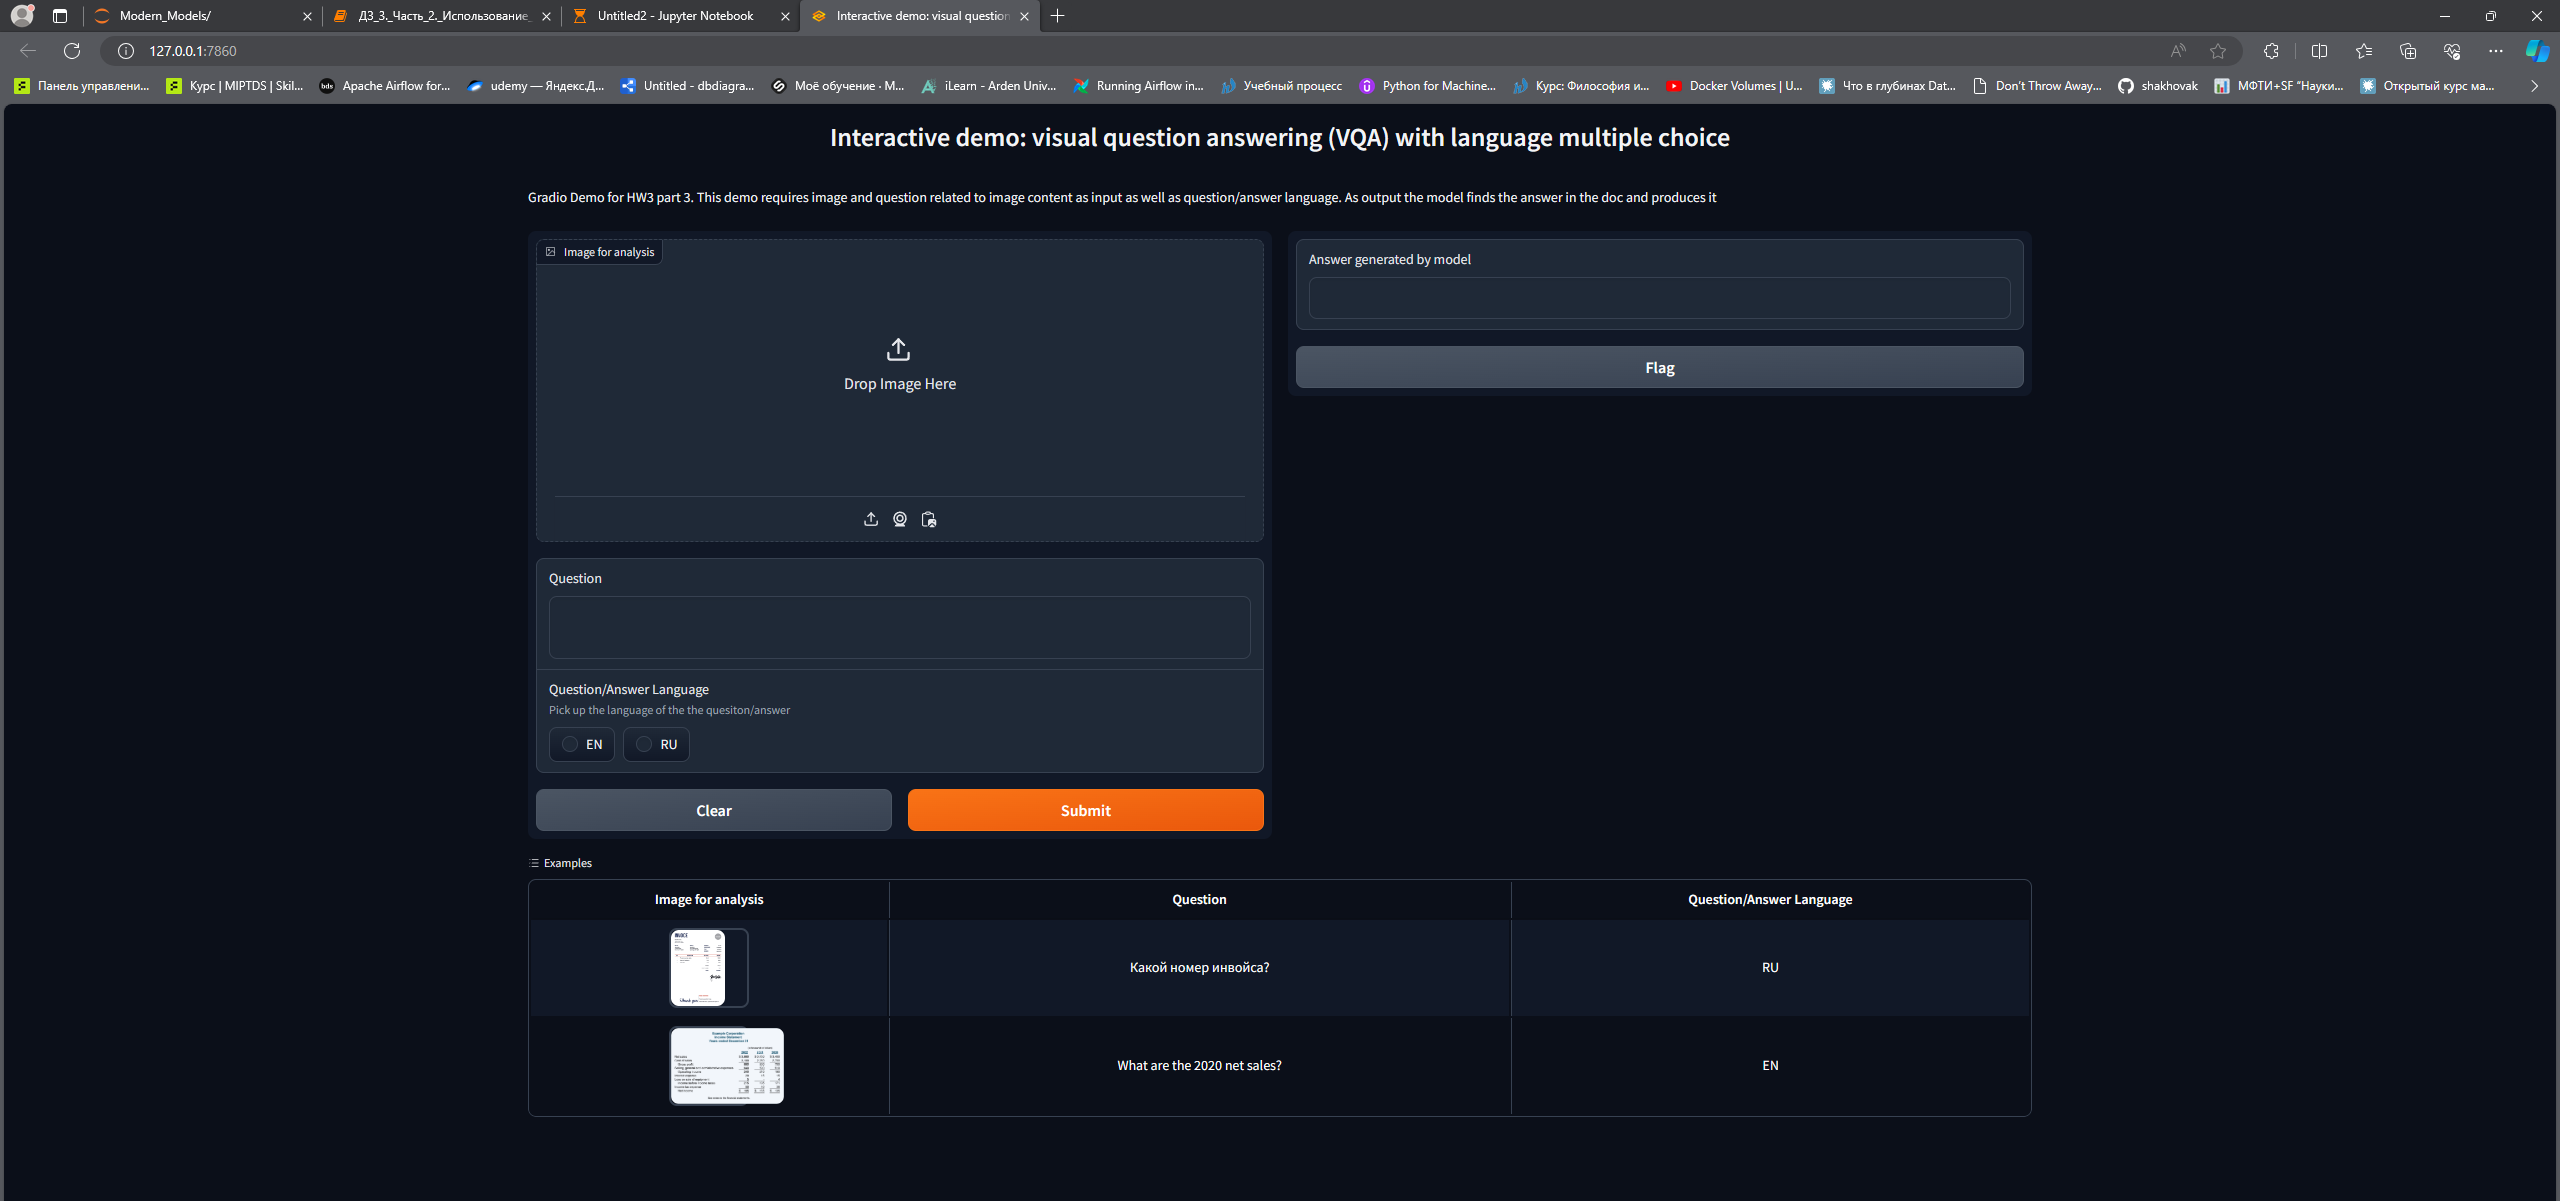